In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Write python code for Entropy based discretization, given the data set "BankAssests"

In [63]:
df = pd.read_csv('IBRD_Balance_Sheet__FY2010 - IBRD_Balance_Sheet__FY2010.csv')
df['dataDiscretization']=pd.cut(df['Amount (US$, Millions)'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])
df.head()

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)",dataDiscretization
0,Assets,Due from Banks - Unrestricted currencies,2010,1581.0,Poor
1,Assets,Due from Banks - Unrestricted currencies,2009,2380.0,Poor
2,Assets,Due from Banks - Currencies subject to restric...,2010,222.0,Poor
3,Assets,Due from Banks - Currencies subject to restric...,2009,664.0,Poor
4,Assets,Investments - Trading,2010,36012.0,Below_average


In [3]:
data = [2,5,10,20,40,25,30,60,40,50,55, 15,35,125,45,-85]
sorted_data = np.sort(data)
sorted_data

array([-85,   2,   5,  10,  15,  20,  25,  30,  35,  40,  40,  45,  50,
        55,  60, 125])

2. Write python code to count number of missing values, replace missing values with median of that variable, find the outlier/noisy data, and replace it with last value of the corresponding variable

In [4]:
dat = pd.read_csv("IBRD_Balance_Sheet__FY2010 - IBRD_Balance_Sheet__FY2010.csv")
dat.isnull().sum()

Category                  0
Line Item                 0
Fiscal Year               0
Amount (US$, Millions)    1
dtype: int64

In [5]:
dat['Amount (US$, Millions)'] = dat['Amount (US$, Millions)'].fillna(value = dat['Amount (US$, Millions)'].median())
dat.isnull().sum()

Category                  0
Line Item                 0
Fiscal Year               0
Amount (US$, Millions)    0
dtype: int64

In [6]:
dat.describe()

,Fiscal Year,"Amount (US$, Millions)"
count,62.000000,62.000000
mean,2009.500000,18039.370968
std,0.504082,33181.875716
min,2009.000000,-3043.000000
25%,2009.000000,627.500000
50%,2009.500000,1581.000000
75%,2010.000000,18258.500000
max,2010.000000,128577.000000


In [7]:
q1 = dat['Amount (US$, Millions)'].quantile(0.25)
q3 = dat['Amount (US$, Millions)'].quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print(lower,upper)

-25819.0 44705.0


In [8]:
#outliers
dat[dat['Amount (US$, Millions)'] < lower]
dat[dat['Amount (US$, Millions)'] > upper]
dat[(dat['Amount (US$, Millions)'] < lower) | (dat['Amount (US$, Millions)'] > upper)]

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"
14,Assets,Derivative Assets - Borrowings,2010,87457.0
15,Assets,Derivative Assets - Borrowings,2009,82793.0
24,Assets,Loans Outstanding - Net loans outstanding,2010,118104.0
25,Assets,Loans Outstanding - Net loans outstanding,2009,103657.0
32,Liabilities,Borrowings,2010,128577.0
33,Liabilities,Borrowings,2009,110040.0
40,Liabilities,Derivative Liabilities - Borrowings,2010,78655.0
41,Liabilities,Derivative Liabilities - Borrowings,2009,76321.0


In [9]:
#without outliers
new_dat = dat[(dat['Amount (US$, Millions)'] > lower) & (dat['Amount (US$, Millions)'] < upper)]
#checking if any outliers
new_dat[(new_dat['Amount (US$, Millions)'] < lower) | (new_dat['Amount (US$, Millions)']> upper)]

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"


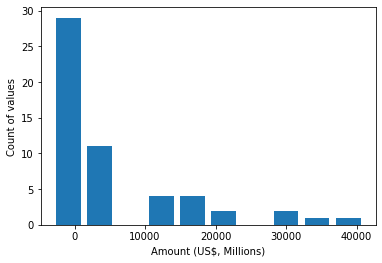

In [10]:
plt.hist(new_dat['Amount (US$, Millions)'] , rwidth = 0.8)
plt.xlabel('Amount (US$, Millions)')
plt.ylabel('Count of values')
plt.show()

3. Write python code for stratified sampling, get 30 % of sample from each category from the  Data set "Wheather_Hyd".

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
weather = pd.read_csv('Hyderabad_June_weather.csv')
weather.head()

,Temp_high,Temp_avg,Temp_low,Dew_High,Dew_Avg,Dew_low,Hum_high,Hum_avg,Hum_low,Sea_high,...,Visib_high,Visib_avg,Visib_low,Wind_high,Wind_avg,Preci_High,Preci_sum,event,month,year
0,39,33,27,21,16,10,70,40,17,1012,...,8,5,3,24,16,-,0.0,"Rain , Thunderstorm",June,2010
1,36,31,26,17,14,12,57,35,25,1014,...,5,5,3,24,16,-,0.0,Normal,June,2010
2,38,32,27,17,14,11,54,34,20,1014,...,7,6,3,24,13,-,0.0,Normal,June,2010
3,38,33,29,18,14,10,48,30,18,1013,...,8,6,3,21,16,-,0.0,Normal,June,2010
4,37,33,30,15,13,11,37,28,21,1012,...,8,7,3,26,16,-,0.0,Normal,June,2010


In [13]:
weather['event_label'] = LabelEncoder().fit_transform(weather['event'])
weather['event_label'].value_counts()

0    168
2     38
1     27
Name: event_label, dtype: int64

In [14]:
x = weather.drop(['event','event_label'],axis = 'columns')
y = weather['event_label']
x_t , x_te , y_t , y_te = train_test_split(x, y,test_size = 0.3, random_state=15,stratify = y)

4. Write python code to apply data transformation to whichever attributes needed for, and apply PCA for dimenstinality reduction on the  Data set "Wheather_Hyd".

In [50]:
data_pca = pd.read_csv('Hyderabad_June_weather.csv')
data_pca = data_pca.drop(['Preci_High','Preci_sum','event','month','year'],axis=1)
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_pca)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
final_data = pca.fit_transform(data_pca)
final_data.shape

(233, 2)

5. Write python code to handle the noisy data given below, using binning method (smooth by means, median, boundary), and kmean clustering.

In [16]:
after_bin = np.zeros((4,4),dtype = float)

Binning by means

In [17]:
for i in range(0,16,4):
    k = i//4
    mean = np.mean(sorted_data[i:i+4])
    for j in range(4):
        after_bin[k][j] = mean
print(after_bin)

[[-17.  -17.  -17.  -17. ]
 [ 22.5  22.5  22.5  22.5]
 [ 40.   40.   40.   40. ]
 [ 72.5  72.5  72.5  72.5]]


Binning by median

In [18]:
for i in range(0,16,4):
    k = i//4
    mean = np.median(sorted_data[i:i+4])
    for j in range(4):
        after_bin[k][j] = mean
print(after_bin)

[[ 3.5  3.5  3.5  3.5]
 [22.5 22.5 22.5 22.5]
 [40.  40.  40.  40. ]
 [57.5 57.5 57.5 57.5]]


Binning by boundaries

In [19]:
for i in range(0,16,4):
    k = i//4
    for j in range(4):
        if (sorted_data[i+j] - sorted_data[i] < sorted_data[i+3] - sorted_data[i+j]):
            after_bin[k][j] = sorted_data[i]
        else:
            after_bin[k][j] = sorted_data[i+3]
print(after_bin)

[[-85.  10.  10.  10.]
 [ 15.  15.  30.  30.]
 [ 35.  45.  45.  45.]
 [ 50.  50.  50. 125.]]


Handling noisy data by kmeans clustering

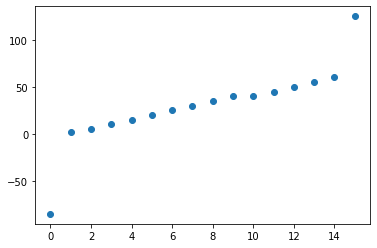

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_frame = pd.DataFrame()
data_frame['data'] = sorted_data
lis = np.array(range(16))
data_frame['count'] = lis
data_frame.head()
plt.scatter(data_frame['count'],data_frame['data'])
plt.show()

In [21]:
sorted_data = np.asarray(sorted_data)
alg = KMeans(n_clusters = 3).fit(sorted_data.reshape(-1,1))
labels = alg.predict(sorted_data.reshape(-1,1))
data_frame['cluster'] = labels
data_frame.head()

,data,count,cluster
0,-85,0,2
1,2,1,0
2,5,2,0
3,10,3,0
4,15,4,0


In [22]:
label0 = data_frame[labels == 0]
label1 = data_frame[labels == 1]
label2 = data_frame[labels == 2]
label0.head()
label1.head()
label2.head()

,data,count,cluster
0,-85,0,2


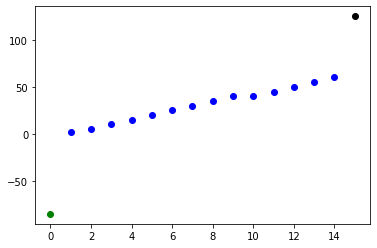

In [23]:
plt.scatter(label0['count'],label0['data'], color = 'blue')
plt.scatter(label1['count'],label1['data'], color = 'black')
plt.scatter(label2['count'],label2['data'], color = 'green')
plt.show()